# Linear Regression 

**Regression analysis** is part of statistics that deals with investigation of the relationship between two or more variables related in a nondeterministic fashion. Objective of regression analysis is to exploit the relationship between two (or more) variables so that we can gain information about one of them through knowing the values of other(s).

e.g. if a rental car costs `$150+ $.25c/mile`, then we can set
```python 
x = the number of miles driven, 
y = the total amount of payment to the rental agency

y = 150 + x * .25

if we have a roundtrip of 100 miles, then
x = 100
y = 150 + 100 * 0.25 = 175
```
We can say that the variables x and y are deterministicaly related. 

There are many examples where we won't be able to call relationship between two variables deterministic, for instance `x =` engine size and `y =` fuel efficiency, or `x =` age of a child and `y =` vocabulary size of the child

**Linear regression** is a statistical method of finding the relationship between independent and dependent variables. 

## Linear Regression in Python

There are two main ways to perform linear regression in Python — with scikit-learn and Statsmodels.


### Linear Regression Example, sklearn

This example uses only one feature of the `diabetes` dataset, BMI. Note that the variables have been standardized to have mean 0 and squared length = 1 (sum(x^2)=1). 

The coefficients, the residual sum of squares and the variance score are also
calculated.

**Diabetes** dataset from Sklearn:

Ten baseline variables, age, sex, body mass index, average blood pressure, and six blood serum measurements were obtained for each of n = 442 diabetes patients, as well as the response of interest, a quantitative measure of disease progression one year after baseline.

original data: https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

features in the dataset: 
1. age 
2. sex 
3. bmi  
4. map  
5. tc  
6. ldl  
7. hdl  
8. tch
9. ltg
10. glu

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Use the diabetes dataset from sklearn
diabetes = datasets.load_diabetes()

In [2]:
diabetes.data[0]

array([ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
       -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613])

In [3]:
type(diabetes.data)

numpy.ndarray

---
**We need to format how our data looks, so that each row is an observation, which is required for the model.**

#### np.newaxis and reshape functions

In [4]:
a = np.array([0.0, 10.0, 20.0, 30.0])
a[:, np.newaxis]

array([[ 0.],
       [10.],
       [20.],
       [30.]])

In [5]:
a = np.array([0.0, 10.0, 20.0, 30.0])
a.reshape(4,1)

array([[ 0.],
       [10.],
       [20.],
       [30.]])

In [6]:
diabetes.data[0,0]

0.0380759064334241

In [7]:
diabetes.data[:, np.newaxis,0]

array([[ 0.03807591],
       [-0.00188202],
       [ 0.08529891],
       [-0.08906294],
       [ 0.00538306],
       [-0.09269548],
       [-0.04547248],
       [ 0.06350368],
       [ 0.04170844],
       [-0.07090025],
       [-0.09632802],
       [ 0.02717829],
       [ 0.01628068],
       [ 0.00538306],
       [ 0.04534098],
       [-0.05273755],
       [-0.00551455],
       [ 0.07076875],
       [-0.0382074 ],
       [-0.02730979],
       [-0.04910502],
       [-0.0854304 ],
       [-0.0854304 ],
       [ 0.04534098],
       [-0.06363517],
       [-0.06726771],
       [-0.10722563],
       [-0.02367725],
       [ 0.05260606],
       [ 0.06713621],
       [-0.06000263],
       [-0.02367725],
       [ 0.03444337],
       [ 0.03081083],
       [ 0.01628068],
       [ 0.04897352],
       [ 0.01264814],
       [-0.00914709],
       [-0.00188202],
       [-0.00188202],
       [ 0.00538306],
       [-0.09996055],
       [-0.06000263],
       [ 0.01991321],
       [ 0.04534098],
       [ 0

In [8]:
diabetes.data[:,np.newaxis,2].shape[0]

442

In [9]:
diabetes.data[:,0].reshape(diabetes.data[:,0].size,1)
#diabetes.data[:,0].reshape(np.size(diabetes.data,0),1)
#diabetes.data[:,0].reshape(diabetes.data[:,0].shape[0],1)

array([[ 0.03807591],
       [-0.00188202],
       [ 0.08529891],
       [-0.08906294],
       [ 0.00538306],
       [-0.09269548],
       [-0.04547248],
       [ 0.06350368],
       [ 0.04170844],
       [-0.07090025],
       [-0.09632802],
       [ 0.02717829],
       [ 0.01628068],
       [ 0.00538306],
       [ 0.04534098],
       [-0.05273755],
       [-0.00551455],
       [ 0.07076875],
       [-0.0382074 ],
       [-0.02730979],
       [-0.04910502],
       [-0.0854304 ],
       [-0.0854304 ],
       [ 0.04534098],
       [-0.06363517],
       [-0.06726771],
       [-0.10722563],
       [-0.02367725],
       [ 0.05260606],
       [ 0.06713621],
       [-0.06000263],
       [-0.02367725],
       [ 0.03444337],
       [ 0.03081083],
       [ 0.01628068],
       [ 0.04897352],
       [ 0.01264814],
       [-0.00914709],
       [-0.00188202],
       [-0.00188202],
       [ 0.00538306],
       [-0.09996055],
       [-0.06000263],
       [ 0.01991321],
       [ 0.04534098],
       [ 0

#### Focus on BMI

In [10]:
# Use only one feature, BMI, BMI is at 2nd index
diabetes_X = diabetes.data[:, np.newaxis, 2]
diabetes_X.size

442

In [11]:
diabetes_X[:5]

array([[ 0.06169621],
       [-0.05147406],
       [ 0.04445121],
       [-0.01159501],
       [-0.03638469]])

In [23]:
diabetes.target

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

#### Split the dataset into test and train
doc: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [12]:
# using the train_test_split
import sklearn
diabetes_X_train, diabetes_X_test, diabetes_y_train, diabetes_y_test = sklearn.model_selection.train_test_split(
    diabetes_X, diabetes.target, test_size = 0.33, random_state = 5)
print (diabetes_X_train.shape)
print (diabetes_X_test.shape)
print (diabetes_y_train.shape)
print (diabetes_y_test.shape)
# train and test dataset sizes are the same, 296 and 146

(296, 1)
(146, 1)
(296,)
(146,)


```sklearn.model_selection.train_test_split(*arrays, **options)[source]```

    Split arrays or matrices into random train and test subsets

    Quick utility that wraps input validation and next(ShuffleSplit().split(X, y)) and application to input data into a single call for splitting (and optionally subsampling) data in a oneliner.

In [13]:
# Not a good way to split... 
# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]
print (diabetes_X_train.size)
print (diabetes_X_test.size)

422
20


In [14]:
# Not a good way to split... 
# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

In [15]:
diabetes_X_train[:5]

array([[ 0.06169621],
       [-0.05147406],
       [ 0.04445121],
       [-0.01159501],
       [-0.03638469]])

#### Linear regression and fit

```class sklearn.linear_model.LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=None)```

source: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression

**Ordinary least squares Linear Regression** (Maximum likelihood estimate of unknown parameters in a linear regression model when the parameters have equal variance and are uncorrelated, and the noise/error is uncorrelated and follows a Gaussian distribution)

- Parameters:

    fit_intercept : boolean, optional, default True
    whether to calculate the intercept for this model. If set to False, no intercept will be used in calculations (e.g. data is expected to be already centered).

    normalize : boolean, optional, default False
    This parameter is ignored when fit_intercept is set to False. If True, the regressors X will be normalized before regression by subtracting the mean and dividing by the l2-norm. If you wish to standardize, please use sklearn.preprocessing.StandardScaler before calling fit on an estimator with normalize=False.


    copy_X : boolean, optional, default True
    If True, X will be copied; else, it may be overwritten.

    n_jobs : int or None, optional (default=None)
    The number of jobs to use for the computation. This will only provide speedup for n_targets > 1 and sufficient large problems. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors. See Glossary for more details.

- Attributes:

    coef_ : array, shape (n_features, ) or (n_targets, n_features)
    Estimated coefficients for the linear regression problem. If multiple targets are passed during the fit (y 2D), this is a 2D array of shape (n_targets, n_features), while if only one target is passed, this is a 1D array of length n_features.

    intercept_ : array
    Independent term in the linear model.
    

- Methods:
  - fit(X, y[, sample_weight]) 	Fit linear model.
  - get_params([deep]) 	Get parameters for this estimator.
  - predict(X) 	Predict using the linear model
  - score(X, y[, sample_weight]) 	Returns the coefficient of determination R^2 of the prediction.
  - set_params(**params) 	Set the parameters of this estimator.


In [16]:
# Create linear regression object
regr = linear_model.LinearRegression()

In [17]:
# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression()

In [18]:
# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

In [19]:
diabetes_X_test.size, diabetes_y_pred.size

(20, 20)

In [20]:
# The coefficients
print('Coefficients: \n', regr.coef_)

# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(diabetes_y_test, diabetes_y_pred))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Variance score: 0.47


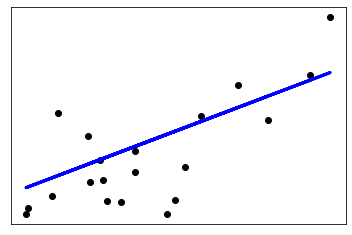

In [21]:
# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

The straight line can be seen in the plot, which is showing how linear regression attempts
to draw a straight line that will best minimize the residual sum of squares
between the observed responses in the dataset, and the responses predicted by
the linear approximation. 

Source: 
https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py

#### Residual Plots
Residual plots visualize the errors in your data. 

Text(0, 0.5, 'Residuals')

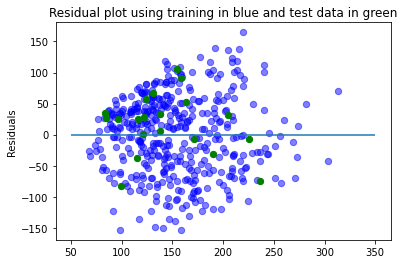

In [22]:
# residual plots
# diabetes_y_pred
plt.scatter(regr.predict(diabetes_X_train),regr.predict(diabetes_X_train)-diabetes_y_train, c = 'b', s= 40, alpha = 0.5)
plt.scatter(regr.predict(diabetes_X_test),regr.predict(diabetes_X_test)-diabetes_y_test, c = 'g', s= 40)
plt.hlines(y=0,xmin =50, xmax = 350)
plt.title('Residual plot using training in blue and test data in green')
plt.ylabel('Residuals')

If data is randomly scattered around line zero, then the model is good. If you see a structure in the plot, that means your model is not able to model the dataset. There could be interaction between 2 variables that should be accounted for. 